##Requerimentos

In [ ]:
pip install gcsfs

In [ ]:
pip install pandera

In [ ]:
pip install pymongo

##Imports

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa
import pymongo
from pymongo import MongoClient

##Configuração do Pandas

In [ ]:
pd.set_option('display.max_columns',100)

O comando acima configura o pandas para que possamos vizualizar até 100 colunas na tela.

##Conectores (GCloud e Mongo)

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA GCLOUD

serviceAccount = '/content/delta-geode-377819-3faebb4b5477.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#CONFIGURAÇÃO DO GCLOUD STORAGE

client_gcloud = storage.Client()
bucket = client_gcloud.get_bucket('mr-jungle-01')
path = 'gs://mr-jungle-01/brutos/marketing_campaign.csv - marketing_campaign.csv (1).csv'


In [ ]:
#Conector MongoDB Atlas
uri = "mongodb+srv://tomaz03.0fildnq.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client_mongo = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-3463438694104533343.pem')

db = client_mongo['Bruto']
colecao = db['marketing_campaign']

##Extração do arquivo e envio ao MongoDB

In [ ]:
#EXTRAÇÃO DO ARQUIVO BRUTO DO GCLOUD

df = pd.read_csv(path, sep=',', encoding='utf-8')


In [ ]:
#ENVIO DO ARQUIVO BRUTO PARA O MONGODB

df_bruto = df.to_dict("records")
colecao.insert_many(df_bruto)

## Validação de Dados

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'ID':pa.Column(pa.Int, nullable=False),
        'ano_nascimento':pa.Column(pa.Int, nullable=False),
        'escolaridade':pa.Column(pa.String, nullable=False),
        'renda':pa.Column(pa.Float, nullable=True),
        'criancas_casa':pa.Column(pa.Int, nullable=False),
        'adolescentes_casa':pa.Column(pa.Int, nullable=False),
        'dias_ultima_compra':pa.Column(pa.Int, nullable=False),
        'gasto_vinhos':pa.Column(pa.Int, nullable=False),
        'gasto_frutas':pa.Column(pa.Int, nullable=False),
        'gasto_peixes':pa.Column(pa.Int, nullable=False),
        'gasto_doces':pa.Column(pa.Int, nullable=False),
        'gasto_ouro':pa.Column(pa.Int, nullable=False),
        'numero_compras_site':pa.Column(pa.Int, nullable=False),
        'visitas_site_mes':pa.Column(pa.Int, nullable=False),
        'aceite_3campanha':pa.Column(pa.Int, nullable=False),
        'aceite_4campanha':pa.Column(pa.Int, nullable=False),
        'aceite_5campanha':pa.Column(pa.Int, nullable=False),
        'aceite_1campanha':pa.Column(pa.Int, nullable=False),
        'reclamacoes':pa.Column(pa.Int, nullable=False),
        'Z_custo_contato':pa.Column(pa.Int, nullable=False),
        'Z_receita':pa.Column(pa.Int, nullable=False),
        'respostas':pa.Column(pa.Int, nullable=False)})

schema.validate(df)

,ID,ano_nascimento,escolaridade,estado_civil,renda,criancas_casa,adolescentes_casa,data_do_cliente,dias_ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,gasto_doces,gasto_ouro,compras_desconto,numero_compras_site,compras_catalogo,compras_loja,visitas_site_mes,aceite_3campanha,aceite_4campanha,aceite_5campanha,aceite_1campanha,aceite_2campanha,reclamacoes,Z_custo_contato,Z_receita,respostas
0,5524,1957,Graduation,SOLTEIRO(A),58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,SOLTEIRO(A),46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,UNIAO ESTAVEL,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,UNIAO ESTAVEL,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,CASADO(A),58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,CASADO(A),61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,UNIAO ESTAVEL,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,DIVORCIADO(A),56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,UNIAO ESTAVEL,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


##Pré-Analise

A partir daqui se dara uma serie de comandos de visualização dos dados para que possa ser feita uma pre análise visual dos dados.

In [ ]:
df.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
pd.unique(df['ano_nascimento'])

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [ ]:
pd.unique(df['escolaridade'])

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Usando o comando *info* e *unique* percebemos:
 

1.   Temos valores faltantes ou *NaN* na coluna Income/renda. inferimos que poderia se tratar de renda não informada ou sem renda. Por não haver uma fonte de informações segura sobre o histórico do DataFrame, optamos por não modificar.

2.   Há idade com os valores *1900* e *1893* que podem ser considerados ou não como incosistências.

3. Decidimos manter os valores faltantes como *NaN* porque é o padrão aceito pelo MongoDB Atlas.





##Transformações (Limpeza, conversão e tradução)

In [ ]:
#AS TRADUÇÕES FORAM FEITAS DE FORMA LITERAL PARA TRADUZIR A IDEIA GERAL DE CADA RÓTULO.
#TRADUZIMOS COMO KIDHOME COMO CRIANCAS_CASA E TEENHOME COMO ADOLESCENTES_CASA POR ENTENDER
#QUE PODEM HAVER CRIANÇAS E ADOLESCENTES NA CASA QUE NÃO SÃO FILHOS DO CLIENTE EM QUESTÃO.


df.rename(columns = {'Year_Birth':'ano_nascimento',
                     'Education':'escolaridade',
                     'Marital_Status':'estado_civil',
                     'Income':'renda',
                     'Kidhome':'criancas_casa',
                     'Teenhome':'adolescentes_casa',
                     'Dt_Customer':"data_do_cliente",
                     'Recency':'dias_ultima_compra',
                     'MntWines':'gasto_vinhos',
                     'MntFruits':'gasto_frutas',
                     'MntMeatProducts':'gasto_carnes',
                     'MntFishProducts':'gasto_peixes',
                     'MntSweetProducts':'gasto_doces',
                     'MntGoldProds':'gasto_ouro',
                     'NumDealsPurchases':'compras_desconto',
                     'NumWebPurchases ':'compras_site',
                     'NumCatalogPurchases':'compras_catalogo',
                     'NumStorePurchases':'compras_loja',
                     'NumWebVisitsMonth':'visitas_site_mes',
                     'AcceptedCmp3':'aceite_3campanha',
                     'AcceptedCmp4':'aceite_4campanha',
                     'AcceptedCmp5':'aceite_5campanha',
                     'AcceptedCmp2':'aceite_2campanha',
                     'AcceptedCmp1':'aceite_1campanha',
                     'Complain':'reclamacoes',
                     'Z_CostContact':'Z_custo_contato',
                     'Z_Revenue':'Z_receita',
                     'Response':'respostas'}, inplace=True)         

In [ ]:
#TRADUÇÃO DOS ESTADOS CIVIL

#ESCOLHEMOS NÃO TRADUZIR 'YOLO' POR SE TRATAR DE UMA GIRIA QUE NÃO TEM EQUIVALENTE EM PORTUGUÊS

#TRADUZIMOS O ESTADO CIVIL 'ALONE' PARA 'RELACIONAMENTO INSTAVEL' POIS VIMOS EM PESQUISA QUE SE
#TRATAR DE UM RELACIONAMENTO "ONDE APENAS SE ESTA JUNTO POR ESTAR" TORNANDO-O INSTAVEL.
#FONTE: https://thoughtcatalog.com/kirsten-corley/2017/09/the-difference-between-being-alone-and-choosing-to-be-single/#:~:text=It's%20better%20to%20choose%20to,be%20with%20someone%20just%20because. 

df.loc[df.estado_civil == 'Single',['estado_civil']] = 'SOLTEIRO(A)'
df.loc[df.estado_civil == 'Together',['estado_civil']] = 'UNIAO ESTAVEL'
df.loc[df.estado_civil == 'Married',['estado_civil']] = 'CASADO(A)'
df.loc[df.estado_civil == 'Divorced',['estado_civil']] = 'DIVORCIADO(A)'
df.loc[df.estado_civil == 'Widow',['estado_civil']] = 'VIUVO(A)'
df.loc[df.estado_civil == 'Alone',['estado_civil']] = 'RELACIONAMENTO INSTAVEL'
df.loc[df.estado_civil == 'Absurd',['estado_civil']] = 'ABSURDO'


In [ ]:
#TRADUÇÃO DAS ESCOLARIDADES
df.loc[df.escolaridade == 'Graduation',['escolaridade']] = 'GRADUADO'
df.loc[df.escolaridade == 'Master',['escolaridade']] = 'MESTRADO'
df.loc[df.escolaridade == 'Basic',['escolaridade']] = 'ENSINO BÁSICO'
df.loc[df.escolaridade == '2n Cycle',['escolaridade']] = 'ENSINO MÉDIO'

In [ ]:
df

,ID,ano_nascimento,escolaridade,estado_civil,renda,criancas_casa,adolescentes_casa,data_do_cliente,dias_ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_peixes,gasto_doces,gasto_ouro,compras_desconto,numero_compras_site,compras_catalogo,compras_loja,visitas_site_mes,aceite_3campanha,aceite_4campanha,aceite_5campanha,aceite_1campanha,aceite_2campanha,reclamacoes,Z_custo_contato,Z_receita,respostas
0,5524,1957,GRADUADO,SOLTEIRO(A),58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,GRADUADO,SOLTEIRO(A),46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,GRADUADO,UNIAO ESTAVEL,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,GRADUADO,UNIAO ESTAVEL,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,CASADO(A),58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUADO,CASADO(A),61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,UNIAO ESTAVEL,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,GRADUADO,DIVORCIADO(A),56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,MESTRADO,UNIAO ESTAVEL,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Insights

In [ ]:
#PERCEBEMOS QUE AQUELES QUE MAIS RESPONDERAM AS CAMPANHAS FORAM OS SOLTEIROS

df.groupby('estado_civil')['respostas'].sum().sort_values(ascending=False)

estado_civil
SOLTEIRO(A)                106
CASADO(A)                   98
UNIAO ESTAVEL               60
DIVORCIADO(A)               48
VIUVO(A)                    19
ABSURDO                      1
RELACIONAMENTO INSTAVEL      1
YOLO                         1
Name: respostas, dtype: int64

<AxesSubplot:ylabel='Estado Civil'>

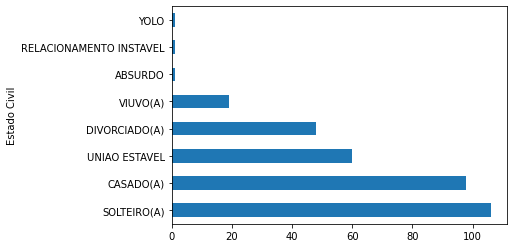

In [ ]:
df.groupby('estado_civil')['respostas'].sum().sort_values(ascending=False).plot.barh(xlabel='Estado Civil',ylabel='número de respostas')

In [ ]:
df.groupby('escolaridade')['respostas'].sum().sort_values(ascending=False)

escolaridade
GRADUADO         152
PhD              101
MESTRADO          57
ENSINO MÉDIO      22
ENSINO BÁSICO      2
Name: respostas, dtype: int64

<AxesSubplot:xlabel='escolaridade', ylabel='Gastos com vinho'>

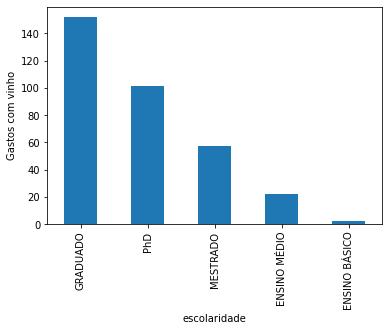

In [ ]:
# ENTRE AS ESCOLARIDADES, OS QUE MAIS RESPONDERAM AS CAMPANHAS FORAM OS GRADUADOS
# SOLTEIROS E GRADUADOS FORAM OS QUE MAIS RESPONDERAM AS CAMPANHAS

df.groupby('escolaridade')['respostas'].sum().sort_values(ascending=False).plot.bar(ylabel='Gastos com vinho')

In [ ]:
# 0 SE NÃO TEM CRIANÇAS, 1 SE TEM CRIANÇAS
df2 = df
df2.loc[df2.criancas_casa == 2,['criancas_casa']] = 1
df2.groupby('criancas_casa')['gasto_vinhos'].sum().sort_values(ascending=False)

criancas_casa
0    583367
1     97449
Name: gasto_vinhos, dtype: int64

<AxesSubplot:xlabel='Sem crianças                         Com crianças', ylabel='Gastos com vinho'>

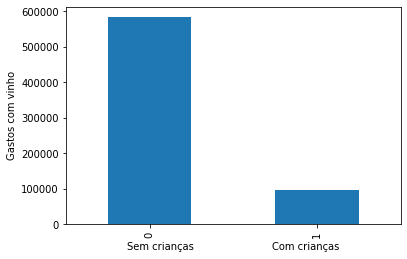

In [ ]:
# PERCEBEMOS QUE QUEM NÃO TEM CRIANÇAS GASTA MAIS EM VINHOS

df2.groupby('criancas_casa')['gasto_vinhos'].sum().sort_values(ascending=False).plot.bar(xlabel='Sem crianças                         Com crianças',ylabel='Gastos com vinho')

In [ ]:
df.rename(columns = {'NumWebPurchases':"numero_compras_site"},inplace=True)

<AxesSubplot:xlabel='ano_nascimento'>

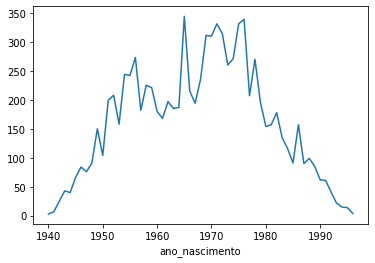

In [ ]:
#GRÁFICO DE NÚMEROS DE COMPRAS ONLINE VS ANO DE NASCIMENTO

#FILTRANDO OS ANOS 1900 E 1893, QUE SÃO OUTLIERS
#PERCEBEMOS QUE O PICO DE QUEM FAZ COMPRAS ONLINE SE DÁ ENTRE QUEM NASCEU
#ENTRE 1960 E 1980
filtro_1900 = df.ano_nascimento>1900
df.loc[filtro_1900].groupby('ano_nascimento')['numero_compras_site'].sum().plot.line()

In [ ]:
#MÉDIA DE RENDA POR ESCOLARIDADE

#PERCEBEMOS QUE A MÉDIA DE RENDA DE QUEM SOMENTE TEM ENSINO BÁSICO CORRESPONDE
#A MENOS QUE A METADE DA MÉDIA DAS RENDAS DOS OUTROS NÍVEIS DE ESCOLARIDADE

lista = list(pd.unique(df['escolaridade']))
for i in lista:
  soma_renda = df.loc[df.escolaridade== i,['renda']].sum() #soma a renda do nível de escolaridade  
  contagem = df.loc[df.escolaridade== i,['escolaridade']].count() #conta quantas pessoas tem essa escolaridade
  media = float(soma_renda)/float(contagem) # media de renda por escolaridade
  print(f'A média de renda do nível de escolaridade {i} é de {float(round(media,2))} dólares')

A média de renda do nível de escolaridade GRADUADO é de 52205.8 dólares
A média de renda do nível de escolaridade PhD é de 55567.69 dólares
A média de renda do nível de escolaridade MESTRADO é de 52202.43 dólares
A média de renda do nível de escolaridade ENSINO BÁSICO é de 20306.26 dólares
A média de renda do nível de escolaridade ENSINO MÉDIO é de 46929.25 dólares


##Envio do Dataframe tratado para o MongoDB

In [ ]:
#INSTANCIAMENTO DO MONGODB

db2 = client_mongo['Tratados']
colecao2 = db2['marketing_campaign_tratado']

In [ ]:
#ENVIO DO ARQUIVO TRATADO PARA O MONGODB

df_tratado = df.to_dict("records")
colecao2.insert_many(df_tratado)

##Envio do Dataframe tratado para o GCloud

In [ ]:
df.to_csv('gs://mr-jungle-01/tratados/marketing_campaign_tratado.csv',index=False)

##Comentários finais

Usando apenas as ferramentas que nos foram ensinadas no curso podemos chegar as conclusões:

1. O DataFrame em questão tinha poucas inconsistências, sendo elas, valores faltantes na coluna 'renda' e duas pessoas com anos de nascimentos fora da curva, 1900 e 1893.

2. Durante a tradução percebemos o uso de expressões linguísticas não utilizadas no Brasil, tentamos trazer de forma mais próxima a nossa realidade e com base em uma pesquisa rápida na internet o significado das mesmas. Seriam as girias o 'YOLO' (You Only Live Once) que teria a tradução literal de 'Você vive apenas uma vez', 'Alone' e 'Absurd'. Optamos por traduzir Alone para 'relacionamento instavel' pois segundo nossas pesquisas o termo é usado para demonstrar um relacionamento que existe apenas pela comodidade, tornando-o instavél. (https://thoughtcatalog.com/kirsten-corley/2017/09/the-difference-between-being-alone-and-choosing-to-be-single/#:~:text=It's%20better%20to%20choose%20to,be%20with%20someone%20just%20because. 

3. Usando as ferramentas fizemos varios insights. Entre eles que aqueles que são solteiros e graduados foram os que melhor responderam as campanhas de marketing e que são os que não tem crianças em casa que mais gastam em vinho e calculamos a média de renda por escolaridade.
 